In [87]:
import pandas as pd
import matplotlib
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt


In [90]:
# collect the csv file data
math = pd.read_csv('../data/Maths.csv', index_col=None)
#convert categories into numbers to allow for modeling
LEncode = LabelEncoder()
each_feature = math.select_dtypes(include = ['object']).columns
for column in each_feature:
    math[column] = LEncode.fit_transform(math[column])
maths_data = math.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# maths_data['G2-G1'] = maths_data['G2'] - ['G1']
# maths_data['G3-G2'] = maths_data['G3'] - ['G2']


In [102]:
maths_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Numeric Feature PCA

In [103]:
feature_data = maths_data.drop(['G3'], axis=1)

In [104]:
feature_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.0,0.0,0.428571,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789
1,0.0,0.0,0.285714,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,0.0,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158
2,0.0,0.0,0.000000,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053
3,0.0,0.0,0.000000,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,1.0,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842
4,0.0,0.0,0.142857,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.0,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.714286,1.0,1.0,0.0,0.50,0.50,0.75,0.75,...,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684
391,1.0,1.0,0.285714,1.0,1.0,1.0,0.75,0.25,0.75,0.75,...,0.0,0.25,0.75,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105
392,1.0,1.0,0.857143,0.0,0.0,1.0,0.25,0.25,0.50,0.50,...,0.0,1.00,1.00,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053
393,1.0,1.0,0.428571,0.0,1.0,1.0,0.75,0.50,0.75,0.50,...,0.0,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579


In [110]:
pca = PCA(n_components=2)
newData = pca.fit_transform(feature_data)

In [111]:
max(newData[:,0])

1.6615444028663207

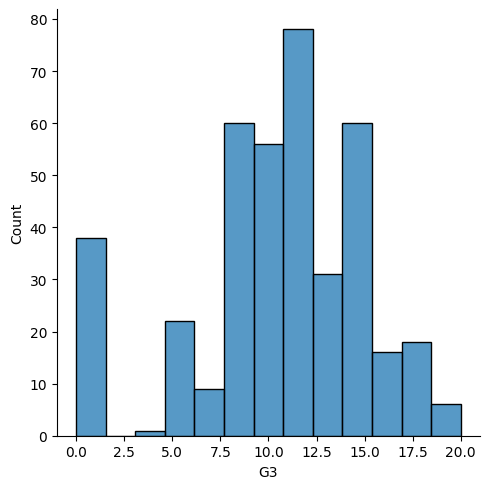

In [112]:
sns.displot(math['G3'])

In [113]:
def assign_label(score_list):
    return [int((x + 1) / 5) for x in score_list]

label_list = assign_label(math['G3'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


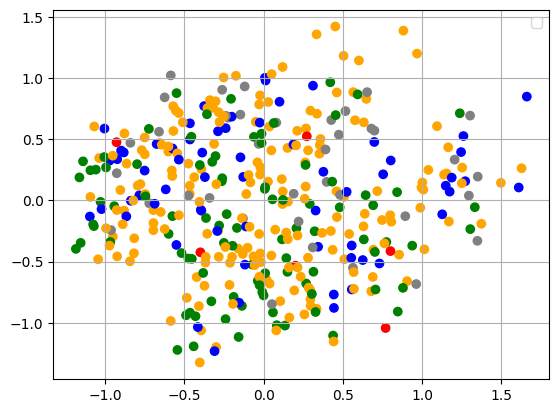

In [114]:
fig, ax = plt.subplots()
colors = ['grey', 'blue', 'orange', 'green', 'red']
color_list = [colors[x] for x in label_list]

ax.scatter(newData[:,0], newData[:,1], c=color_list)

ax.legend()
ax.grid(True)

In [115]:
pca.explained_variance_ratio_

array([0.11288762, 0.08875346])

In [116]:
pca.components_

array([[ 0.12065756,  0.43161664,  0.0551039 , -0.12597239,  0.13517363,
        -0.00377716, -0.13776522, -0.1124126 , -0.04218418,  0.01670985,
        -0.19777348, -0.00473843,  0.07233737, -0.18264246,  0.10574069,
        -0.08251999, -0.51133847, -0.5186905 , -0.0245197 , -0.13771497,
        -0.10061657, -0.14644035, -0.06378374,  0.00673905,  0.07080144,
         0.04484627,  0.08316113,  0.15071202,  0.0922372 , -0.00909137,
        -0.01989792, -0.03417942],
       [ 0.14468661, -0.58367511,  0.07673356, -0.14843871, -0.13370275,
        -0.01444899, -0.22274894, -0.17531657, -0.25969079, -0.05180003,
        -0.07050757,  0.06578132,  0.05033668,  0.05574938,  0.0851018 ,
         0.04108379, -0.09246674, -0.17394424, -0.4768585 , -0.13260952,
        -0.03897225, -0.22360958,  0.13700029, -0.03231296, -0.11639736,
        -0.08231698, -0.08275194, -0.12581169, -0.06381334,  0.00152093,
        -0.08370833, -0.09399005]])